In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
pd.options.display.float_format = '{:,.2f}'.format;

In [18]:
df = pd.read_csv('boston_houses_data/data.csv')
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [19]:
X = df['rm'].values.reshape(-1,1) #X -> features
y = df['medv'].values #y -> target

In [20]:
model = LinearRegression()

In [21]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
model.coef_ #Beta

array([9.10210898])

In [23]:
model.intercept_ #c

-34.670620776438554

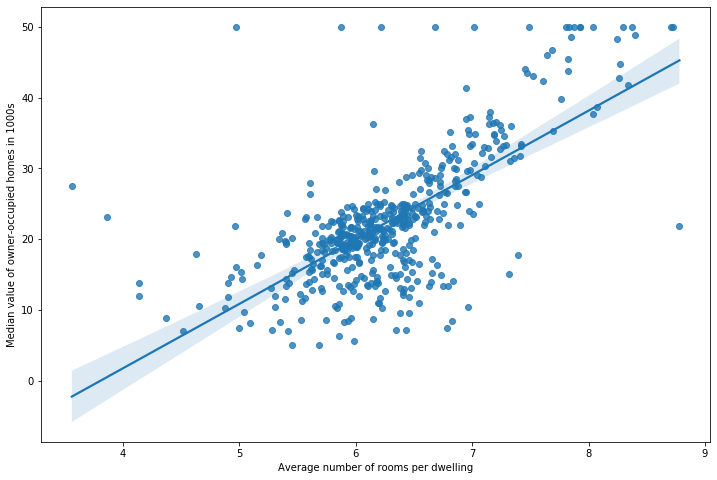

In [25]:
plt.figure(figsize=(12,8));
sns.regplot(X,y);
plt.xlabel('Average number of rooms per dwelling');
plt.ylabel('Median value of owner-occupied homes in 1000s');
plt.show();

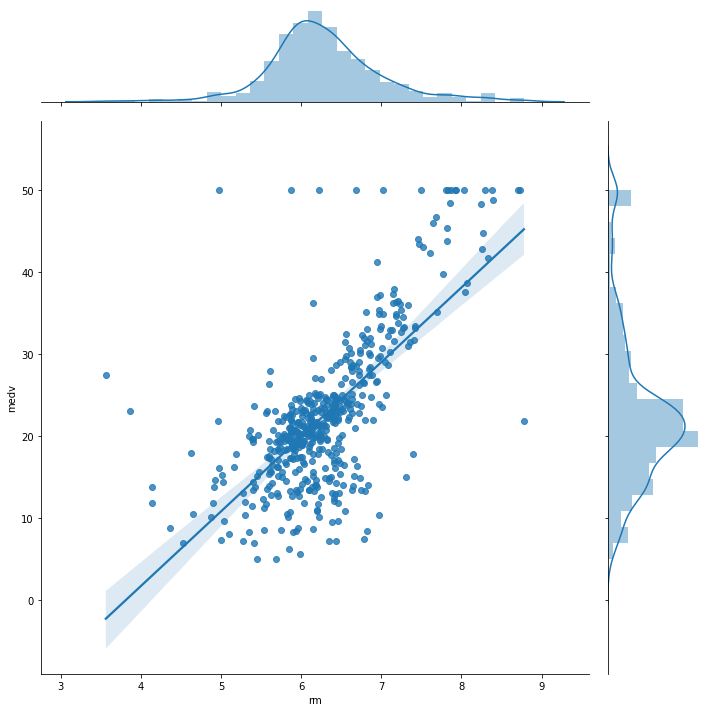

In [27]:
sns.jointplot(x='rm', y='medv', data=df, kind='reg',height=10);
plt.show();

In [33]:
prediction = model.predict(np.array([7]).reshape(-1,1));
print(prediction)

[29.04414209]


In [40]:
model = LinearRegression()

In [41]:
X = df['lstat'].values.reshape(-1,1);
y = df['medv'].values;

In [44]:
model.fit(X,y);

In [45]:
prediction = model.predict(np.array([15]).reshape(-1,1));
print(prediction)

[20.30310057]


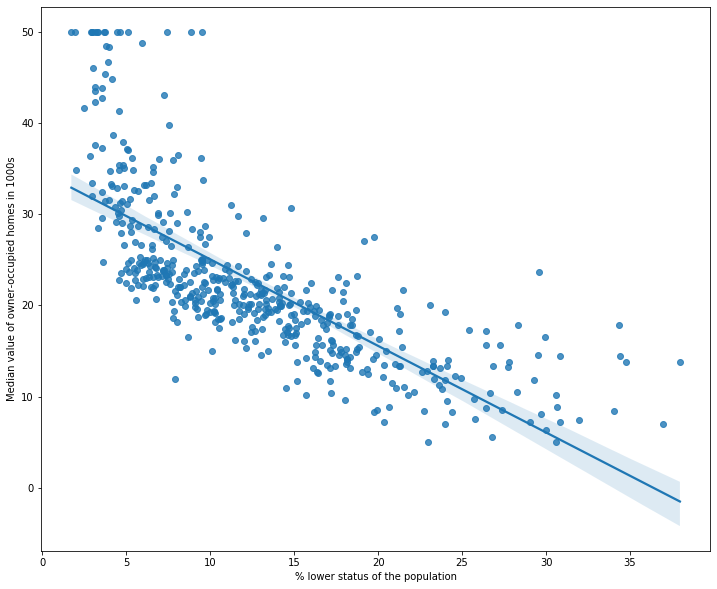

In [46]:
plt.figure(figsize=(12,10));
sns.regplot(X,y);
plt.xlabel('% lower status of the population');
plt.ylabel('Median value of owner-occupied homes in 1000s');
plt.show();

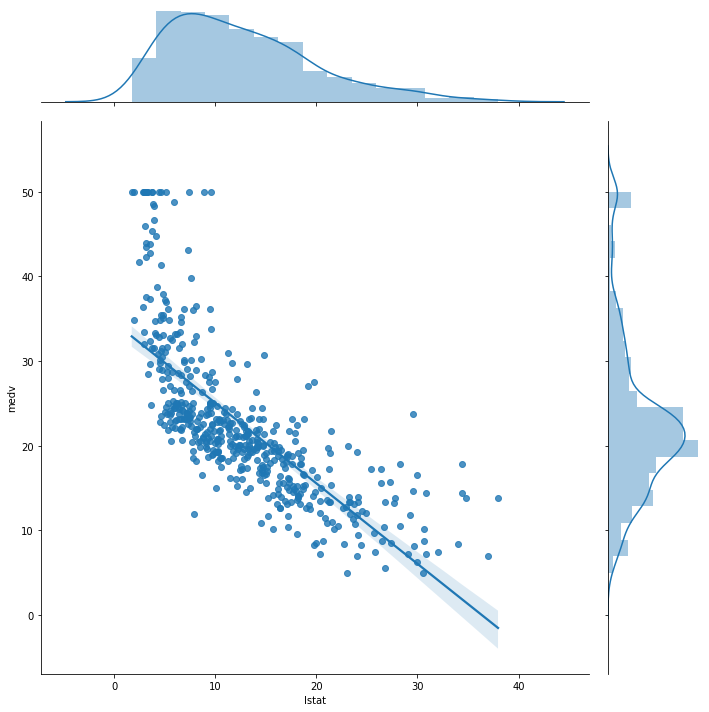

In [48]:
sns.jointplot(x='lstat', y='medv', data=df, kind='reg',height=10);
plt.show();

In [49]:
from sklearn.linear_model import RANSACRegressor

In [50]:
ransac = RANSACRegressor()

In [51]:
ransac.fit(X, y);

In [54]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [57]:
line_X = np.arange(3, 10,1);
line_y_ransac = ransac.predict(np.array([5]).reshape(-1,1))
print(line_y_ransac)

[25.34919544]


<h1>Performance evaluation</h1>

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('boston_houses_data/data.csv')

In [7]:
X = df['lstat'].values.reshape(-1,1)

In [18]:
X = df.iloc[:, :-1].values
#print(df.head())
#print(df.iloc[:, :-1].head())

In [19]:
y = df['medv'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_train_pred = model.predict(X_train)

In [24]:
y_test_pred = model.predict(X_test)

<h1>Method 1. Residual Analysis</h1>

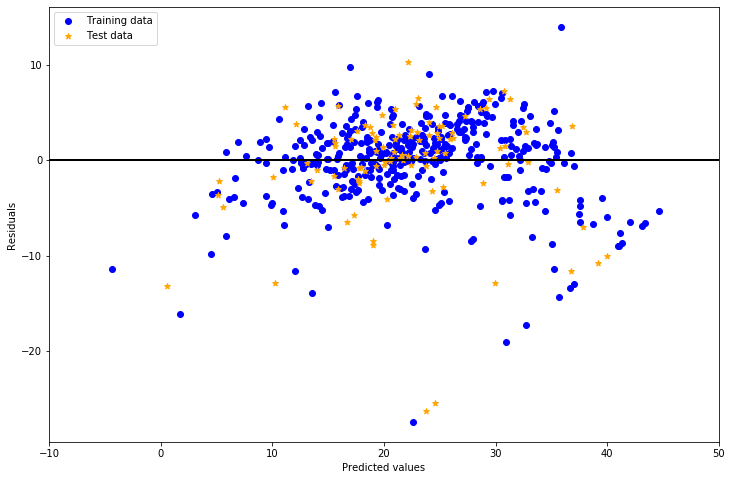

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10,50])
plt.show()

<h1>Method 2. Mean squared Error (MSE)</h1>

In [29]:
from sklearn.metrics import mean_squared_error as mse


In [30]:
mse(y_train, y_train_pred)

19.326470203585725

In [31]:
mse(y_test, y_test_pred)

33.44897999767634

<h1>Method 3. Coefficient of Determination (r2)</h1>

In [32]:
from sklearn.metrics import r2_score as r2

In [34]:
r2(y_train, y_train_pred)

0.7730135569264234

In [35]:
r2(y_test, y_test_pred)

0.5892223849182531